In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', 104)
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as pyoff
#pd.set_option('display.max_rows', 27193)
%matplotlib inline

##### Let us initialize the required values ( we will use them later in the program )
we will set the minimum marks to 40 to pass in a exam

In [38]:
passmark = 50

In [13]:
#load the dataset
districts = pd.read_csv('data/districts.csv')

In [14]:
districts.head()

,system,system_name,alg_1,alg_2,bio,chem,ela,eng_1,eng_2,eng_3,math,science,enrollment,black,hispanic,native,el,swd,ed,expenditures,act_composite,chronic_abs,suspended,expelled,grad,dropout,region
0,0,State of Tennessee,70.0,54.3,65.3,44.2,48.4,71.8,64.8,41.7,54.7,64.5,943699.0,24.1,8.5,0.3,4.6,14.0,57.9,9374.9,19.4,13.2,6.2,0.2,87.2,8.4,NaN
1,10,Anderson County,76.1,63.3,73.6,41.0,45.7,73.7,59.2,38.2,54.0,64.5,6304.0,2.8,1.1,0.5,0.2,18.0,58.5,9535.7,19.9,11.5,5.0,0.1,94.0,4.2,East TN
2,11,Clinton City,NaN,NaN,NaN,NaN,58.3,NaN,NaN,NaN,68.9,69.6,894.0,5.7,2.8,0.3,1.0,18.1,63.4,9537.5,NaN,8.8,1.2,0.0,NaN,NaN,East TN
3,12,Oak Ridge City,76.9,72.0,83.5,80.9,56.1,86.7,74.6,53.8,55.3,70.8,4326.0,16.6,8.0,0.7,3.0,14.3,52.5,12355.5,23.1,17.5,5.7,0.0,89.7,4.4,East TN
4,20,Bedford County,64.3,42.4,62.1,32.5,44.1,72.3,63.1,44.6,53.1,61.8,8270.0,11.2,20.6,0.5,9.4,10.9,69.9,7756.2,18.4,8.6,2.2,0.0,90.8,5.4,South Central


###### Size of data frame

In [39]:
districts.shape

(146, 28)

In [15]:
# Filter to find the number of districts with a 100% Algebra I proficiency rate.
algebra_100 = districts.loc[districts['alg_1'] == 100]


In [16]:
algebra_100

,system,system_name,alg_1,alg_2,bio,chem,ela,eng_1,eng_2,eng_3,math,science,enrollment,black,hispanic,native,el,swd,ed,expenditures,act_composite,chronic_abs,suspended,expelled,grad,dropout,region
64,401,Paris SSD,100.0,NaN,NaN,NaN,52.3,NaN,NaN,NaN,60.6,76.6,1655.0,25.9,2.0,0.0,0.7,17.7,63.6,8840.9,NaN,6.9,2.4,0.0,NaN,NaN,Northwest
81,541,Athens City,100.0,NaN,NaN,NaN,52.9,NaN,NaN,NaN,59.4,62.5,1504.0,16.5,8.0,0.4,0.1,13.8,73.7,10444.7,NaN,6.8,1.9,0.0,NaN,NaN,Southeast
138,941,Franklin SSD,100.0,NaN,NaN,NaN,69.1,NaN,NaN,NaN,73.2,83.3,3515.0,15.5,24.0,0.7,12.2,12.5,38.9,13386.3,NaN,3.2,0.3,0.0,NaN,NaN,Mid Cumberland
140,951,Lebanon SSD,100.0,NaN,NaN,NaN,49.8,NaN,NaN,NaN,52.6,71.3,3572.0,18.4,13.0,0.4,9.2,14.0,61.9,8444.1,NaN,8.4,4.9,0.0,NaN,NaN,Mid Cumberland


In [19]:
algebra_100.system.value_counts().sum()

4

###### Let us understand about the basic information of the data, like min, max, mean and standard deviation etc.

In [17]:
districts.describe()

,system,alg_1,alg_2,bio,chem,ela,eng_1,eng_2,eng_3,math,science,enrollment,black,hispanic,native,el,swd,ed,expenditures,act_composite,chronic_abs,suspended,expelled,grad,dropout
count,146.000000,125.000000,121.000000,129.000000,124.000000,143.000000,128.000000,128.000000,128.000000,142.000000,144.000000,142.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,142.000000,126.000000,145.000000,146.000000,146.000000,129.000000,129.000000
mean,480.486301,70.923200,56.385124,66.472093,45.199194,48.029371,72.425781,64.650000,44.057812,55.484507,65.420833,13291.352113,12.910274,5.655479,0.311644,2.115068,16.719178,59.954795,9059.253521,19.214286,13.130345,2.900685,0.065068,90.043411,5.981395
std,297.071528,14.463592,17.899403,14.420829,15.573422,10.904023,9.351847,11.105386,12.234774,10.957696,12.692385,79742.083248,16.787334,5.126268,0.232382,3.026853,11.922788,16.336121,999.621520,1.580163,6.407248,3.278067,0.132661,9.404502,4.407624
min,0.000000,22.900000,14.700000,11.800000,14.300000,6.700000,36.800000,6.700000,8.200000,23.300000,7.400000,270.000000,0.100000,0.000000,0.000000,0.000000,9.800000,0.000000,7270.000000,14.200000,2.000000,0.000000,0.000000,11.100000,0.000000
25%,212.500000,63.200000,44.300000,59.300000,33.850000,42.700000,67.500000,58.550000,36.375000,48.250000,59.650000,1659.750000,2.725000,2.100000,0.200000,0.125000,13.325000,53.325000,8427.050000,18.400000,8.800000,0.525000,0.000000,87.600000,3.100000
50%,485.000000,73.100000,57.900000,68.900000,44.200000,47.500000,73.150000,66.150000,44.250000,55.300000,66.500000,3456.500000,6.250000,4.050000,0.300000,0.950000,14.800000,61.900000,8862.300000,18.900000,12.300000,2.200000,0.000000,91.500000,5.300000
75%,757.750000,79.500000,68.000000,74.500000,54.775000,53.650000,77.525000,71.400000,51.325000,62.600000,72.500000,6353.500000,16.250000,7.700000,0.400000,2.775000,17.075000,70.175000,9419.450000,19.850000,16.900000,4.275000,0.100000,94.900000,7.900000
max,985.000000,100.000000,92.600000,100.000000,86.100000,83.200000,92.900000,88.700000,72.200000,88.200000,91.100000,943699.000000,96.700000,25.300000,1.200000,16.200000,98.800000,97.900000,13386.300000,24.100000,41.300000,21.400000,0.800000,100.000000,27.600000


###### Let's check for any missing values

In [40]:
districts.isnull().sum()

system               0
system_name          0
alg_1               21
alg_2               25
bio                 17
chem                22
ela                  3
eng_1               18
eng_2               18
eng_3               18
math                 4
science              2
enrollment           4
black                0
hispanic             0
native               0
el                   0
swd                  0
ed                   0
expenditures         4
act_composite       20
chronic_abs          1
suspended            0
expelled             0
grad                17
dropout             17
region               1
math_achievement     0
dtype: int64

In [20]:
districts.dtypes

system             int64
system_name       object
alg_1            float64
alg_2            float64
bio              float64
chem             float64
ela              float64
eng_1            float64
eng_2            float64
eng_3            float64
math             float64
science          float64
enrollment       float64
black            float64
hispanic         float64
native           float64
el               float64
swd              float64
ed               float64
expenditures     float64
act_composite    float64
chronic_abs      float64
suspended        float64
expelled         float64
grad             float64
dropout          float64
region            object
dtype: object

###### Lets explore the algebra score!

In [42]:
districts['alg1_PassStatus'] = np.where(districts['alg_1']<passmark, 'F', 'P')
districts.alg1_PassStatus.value_counts()

P    138
F      8
Name: alg1_PassStatus, dtype: int64

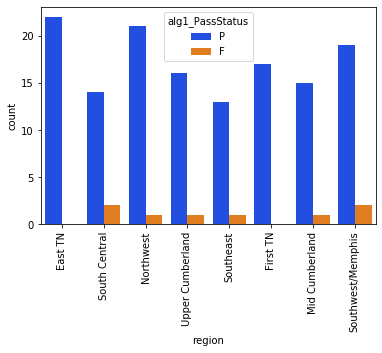

In [43]:
p = sns.countplot(x='region', data = districts, hue='alg1_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

###### How many districts pass in alg_2

In [44]:
districts['alg2_PassStatus'] = np.where(districts['alg_2']<passmark, 'F', 'P')
districts.alg2_PassStatus.value_counts()

P    106
F     40
Name: alg2_PassStatus, dtype: int64

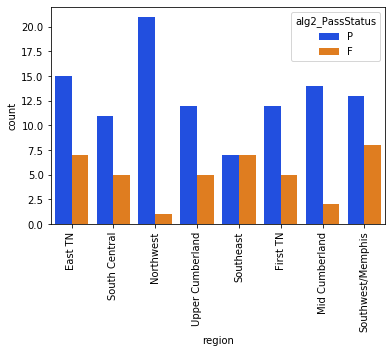

In [45]:
p = sns.countplot(x='region', data = districts, hue='alg2_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

###### How many districts pass in biology

In [46]:
districts['bio_PassStatus'] = np.where(districts['bio']<passmark, 'F', 'P')
districts.bio_PassStatus.value_counts()

P    135
F     11
Name: bio_PassStatus, dtype: int64

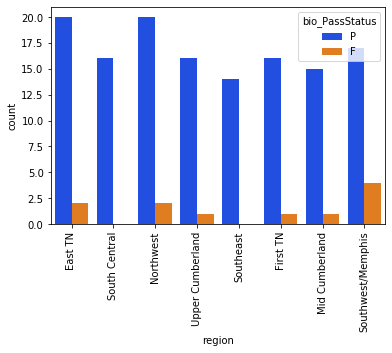

In [47]:
p = sns.countplot(x='region', data = districts, hue='bio_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

###### How many districts pass in chemistry

In [48]:
districts['chem_PassStatus'] = np.where(districts['chem']<passmark, 'F', 'P')
districts.chem_PassStatus.value_counts()

F    80
P    66
Name: chem_PassStatus, dtype: int64

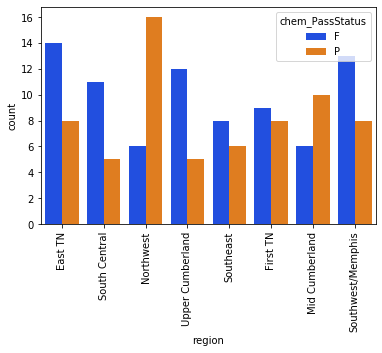

In [49]:
p = sns.countplot(x='region', data = districts, hue='chem_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

In [21]:
#Convert System as type float!
districts['system'] = districts.system.astype(float)

In [22]:
#Creating a new column(s) called for 'math_achievement' with a value of:
# "High" if a district's Math proficiency is 75% or higher;
# "Medium"` if a district's Math proficiency is between 50% and 75%
# "Low"` if a district's Math proficiency is below 50%.

#Adding a new column named 'math_achievement' 


def conditions(s):
    if (s['math'] >= 75):
        return "High"
    if (s['math'] >= 50) | (s['math'] < 75):
        return "Medium"
    else:
        return "Low"
   

In [23]:
districts['math_achievement'] = districts.apply(conditions, axis=1)

In [24]:
districts.head(2)

,system,system_name,alg_1,alg_2,bio,chem,ela,eng_1,eng_2,eng_3,math,science,enrollment,black,hispanic,native,el,swd,ed,expenditures,act_composite,chronic_abs,suspended,expelled,grad,dropout,region,math_achievement
0,0.0,State of Tennessee,70.0,54.3,65.3,44.2,48.4,71.8,64.8,41.7,54.7,64.5,943699.0,24.1,8.5,0.3,4.6,14.0,57.9,9374.9,19.4,13.2,6.2,0.2,87.2,8.4,NaN,Medium
1,10.0,Anderson County,76.1,63.3,73.6,41.0,45.7,73.7,59.2,38.2,54.0,64.5,6304.0,2.8,1.1,0.5,0.2,18.0,58.5,9535.7,19.9,11.5,5.0,0.1,94.0,4.2,East TN,Medium


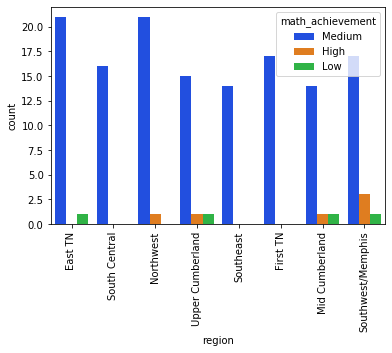

In [50]:
p = sns.countplot(x='region', data = districts, hue='math_achievement', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

###### Lets check how many distrcicts pass in all subjects

In [52]:
districts['OverAll_alg_PassStatus'] = districts.apply(lambda x : 'F' if x['alg1_PassStatus'] == 'F' or 
                                    x['alg2_PassStatus'] == 'F'  else 'P', axis =1)

districts.OverAll_alg_PassStatus.value_counts()

P    103
F     43
Name: OverAll_alg_PassStatus, dtype: int64

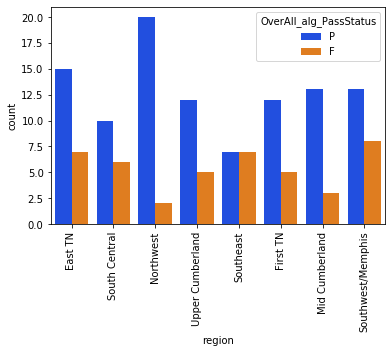

In [53]:
p = sns.countplot(x='region', data = districts, hue='OverAll_alg_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

###### Finding the percentage of Algebra

In [54]:
districts['Total_Marks'] = districts['alg_1']+districts['alg_2']
districts['Percentage'] = districts['Total_Marks']/2

###### Let us assign the grades
Grading
above 80 = A Grade
70 to 80 = B Grade
60 to 70 = C Grade
50 to 60 = D Grade
40 to 50 = E Grade
below 40 = F Grade ( means Fail )

In [59]:
def GetGrade(Percentage, OverAll_alg_PassStatus):
    if ( OverAll_alg_PassStatus == 'F'):
        return 'F'    
    if ( Percentage >= 80 ):
        return 'A'
    if ( Percentage >= 70):
        return 'B'
    if ( Percentage >= 60):
        return 'C'
    if ( Percentage >= 50):
        return 'D'
    else: 
        return 'F'

districts['Grade_alg_1'] = districts.apply(lambda x : GetGrade(x['Percentage'], x['OverAll_alg_PassStatus']), axis=1)

districts.Grade_alg_1.value_counts()

F    68
C    33
B    24
A    14
D     7
Name: Grade_alg_1, dtype: int64

###### Plot the grades obtained in a order

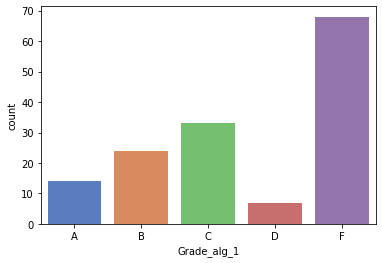

In [61]:
sns.countplot(x="Grade_alg_1", data = districts, order=['A','B','C','D','F'],  palette="muted")
plt.show()

In [25]:
districts.groupby('system_name').mean()

,system,alg_1,alg_2,bio,chem,ela,eng_1,eng_2,eng_3,math,science,enrollment,black,hispanic,native,el,swd,ed,expenditures,act_composite,chronic_abs,suspended,expelled,grad,dropout
system_name,,,,,,,,,,,,,,,,,,,,,,,,,
Achievement School District,985.0,34.0,20.4,20.6,NaN,14.3,37.8,33.0,8.2,23.3,26.1,6370.0,96.7,1.5,0.0,1.1,12.9,96.6,12804.4,14.2,27.2,21.4,0.1,54.7,27.6
Alamo City,171.0,NaN,NaN,NaN,NaN,53.5,NaN,NaN,NaN,62.8,74.6,578.0,11.6,16.7,0.0,1.1,11.4,69.9,8669.4,NaN,7.8,0.2,0.0,NaN,NaN
Alcoa City,51.0,82.2,76.8,88.0,66.0,50.2,85.5,79.6,67.2,56.6,65.1,1850.0,23.3,9.5,0.6,2.7,13.0,49.4,10320.0,22.0,4.7,3.1,0.1,98.2,0.9
Alvin C. York Institute,961.0,79.5,69.8,70.4,24.3,NaN,72.4,66.0,52.4,NaN,NaN,NaN,0.3,1.3,0.5,0.2,10.0,61.9,NaN,NaN,20.8,0.0,0.0,81.3,14.2
Anderson County,10.0,76.1,63.3,73.6,41.0,45.7,73.7,59.2,38.2,54.0,64.5,6304.0,2.8,1.1,0.5,0.2,18.0,58.5,9535.7,19.9,11.5,5.0,0.1,94.0,4.2
Arlington City,793.0,88.0,66.9,82.5,49.8,75.7,88.8,78.1,50.7,75.1,88.3,4819.0,16.0,5.3,0.4,2.2,11.0,13.9,7705.1,21.1,7.9,2.3,0.1,94.0,4.4
Athens City,541.0,100.0,NaN,NaN,NaN,52.9,NaN,NaN,NaN,59.4,62.5,1504.0,16.5,8.0,0.4,0.1,13.8,73.7,10444.7,NaN,6.8,1.9,0.0,NaN,NaN
Bartlett City,794.0,78.1,59.5,71.8,36.2,60.6,80.3,74.6,41.6,66.2,75.9,8235.0,27.5,5.0,0.6,2.3,13.8,36.3,8857.7,20.5,9.6,4.0,0.3,81.3,9.4
Bedford County,20.0,64.3,42.4,62.1,32.5,44.1,72.3,63.1,44.6,53.1,61.8,8270.0,11.2,20.6,0.5,9.4,10.9,69.9,7756.2,18.4,8.6,2.2,0.0,90.8,5.4


In [26]:
district_sort = districts.sort_values(['region', 'alg_1'], ascending=[True, False])

In [27]:
district_sort.head(2)

,system,system_name,alg_1,alg_2,bio,chem,ela,eng_1,eng_2,eng_3,math,science,enrollment,black,hispanic,native,el,swd,ed,expenditures,act_composite,chronic_abs,suspended,expelled,grad,dropout,region,math_achievement
9,52.0,Maryville City,83.8,77.3,92.1,80.4,69.6,89.9,82.7,68.1,70.2,87.1,4944.0,4.2,4.0,0.2,2.8,13.2,32.1,10161.2,23.0,2.0,2.7,0.0,96.6,3.1,East TN,Medium
8,51.0,Alcoa City,82.2,76.8,88.0,66.0,50.2,85.5,79.6,67.2,56.6,65.1,1850.0,23.3,9.5,0.6,2.7,13.0,49.4,10320.0,22.0,4.7,3.1,0.1,98.2,0.9,East TN,Medium


In [28]:
alg_1 = district_sort[['region', 'alg_1', 'system_name']].sort_values(['alg_1'], ascending=[False])

In [29]:
alg_1.head(4)

,region,alg_1,system_name
138,Mid Cumberland,100.0,Franklin SSD
81,Southeast,100.0,Athens City
140,Mid Cumberland,100.0,Lebanon SSD
64,Northwest,100.0,Paris SSD


## Find the mean, minimum, and maximum district graduation rate

In [30]:
grad_descr = districts.groupby('system_name').grad.agg(['mean', 'min', 'max'])

In [31]:
grad_descr.sort_values(['mean'], ascending=[False])

,mean,min,max
system_name,,,
Meigs County,100.0,100.0,100.0
Bradford SSD,100.0,100.0,100.0
Oneida SSD,98.8,98.8,98.8
Johnson County,98.6,98.6,98.6
Greeneville City,98.6,98.6,98.6
Alcoa City,98.2,98.2,98.2
Morgan County,97.9,97.9,97.9
Tipton County,97.8,97.8,97.8
Fayetteville City,97.5,97.5,97.5


In [32]:
shelby_county = districts[districts.system.isin([792])]

In [33]:
shelby_county

,system,system_name,alg_1,alg_2,bio,chem,ela,eng_1,eng_2,eng_3,math,science,enrollment,black,hispanic,native,el,swd,ed,expenditures,act_composite,chronic_abs,suspended,expelled,grad,dropout,region,math_achievement
113,792.0,Shelby County,59.3,37.3,42.8,23.7,33.0,55.4,48.9,24.0,39.8,47.8,108936.0,78.4,11.3,0.1,8.3,12.9,79.8,11221.6,16.9,17.5,18.5,0.8,72.1,17.6,Southwest/Memphis,Medium


## Read in the tvaas.csv file.

In [34]:
tvaas= pd.read_csv('data/tvaas.csv')

In [35]:
tvaas.head(2)

,District Number,District Name,Composite,Literacy,Numeracy
0,10,Anderson County,1.0,1.0,3.0
1,11,Clinton City,5.0,5.0,5.0


In [36]:
tvaas.columns

Index(['District Number', 'District Name', 'Composite', 'Literacy',
       'Numeracy'],
      dtype='object')

In [37]:
# Rename columns as follows:
#    * `District Number` to `system`.
#    * `Composite` to `TVAAS Composite`.
#    * `Literacy` to `TVAAS Literacy`.
#    * `Numeracy` to `TVAAS Numeracy`.

tvaas.rename(columns= {'District Number': 'System','District Name': 'District_Name', 'Composite': 'TVAAS_Composite', 'Literacy': 'TVAAS_Literacy','Numeracy': 'TVAAS_Numeracy' }).head(2)

,System,District_Name,TVAAS_Composite,TVAAS_Literacy,TVAAS_Numeracy
0,10,Anderson County,1.0,1.0,3.0
1,11,Clinton City,5.0,5.0,5.0


In [44]:
#Create a new column(s) called `math_achievement` with a value of:
# "High"` if a district's Math proficiency is 75% or higher;
# "Medium"` if a district's Math proficiency is between 50% and 75%
# "Low"` if a district's Math proficiency is below 50%.

#Adding a new column named 'math_achievement' 


def conditions(s):
    if (s['math'] > 70):
        return "High"
    if (s['math'] > 50 (s['math'] < 70)):
        return "Medium"
    else:
        return "Low"

In [51]:
districts['math_achievement'] = districts.apply(conditions, axis=1)

TypeError: ("'int' object is not callable", 'occurred at index State of Tennessee')

In [46]:
def f(row):
    if row['math'] > 70:
        val = "High"
    elif (row['math'] >50 & row['math'] <70):
        val = "Medium"
    else:
        val = "Low"
    return val

In [62]:
districts.apply(f, axis=1)

TypeError: ("unsupported operand type(s) for &: 'int' and 'float'", 'occurred at index State of Tennessee')

In [53]:
shelby_county = districts[districts.system.isin([792])]

In [54]:
shelby_county

,system,alg_1,alg_2,bio,chem,ela,eng_1,eng_2,eng_3,math,science,enrollment,black,hispanic,native,el,swd,ed,expenditures,act_composite,chronic_abs,suspended,expelled,grad,dropout,region
system_name,,,,,,,,,,,,,,,,,,,,,,,,,,
Shelby County,792,59.3,37.3,42.8,23.7,33.0,55.4,48.9,24.0,39.8,47.8,108936.0,78.4,11.3,0.1,8.3,12.9,79.8,11221.6,16.9,17.5,18.5,0.8,72.1,17.6,Southwest/Memphis


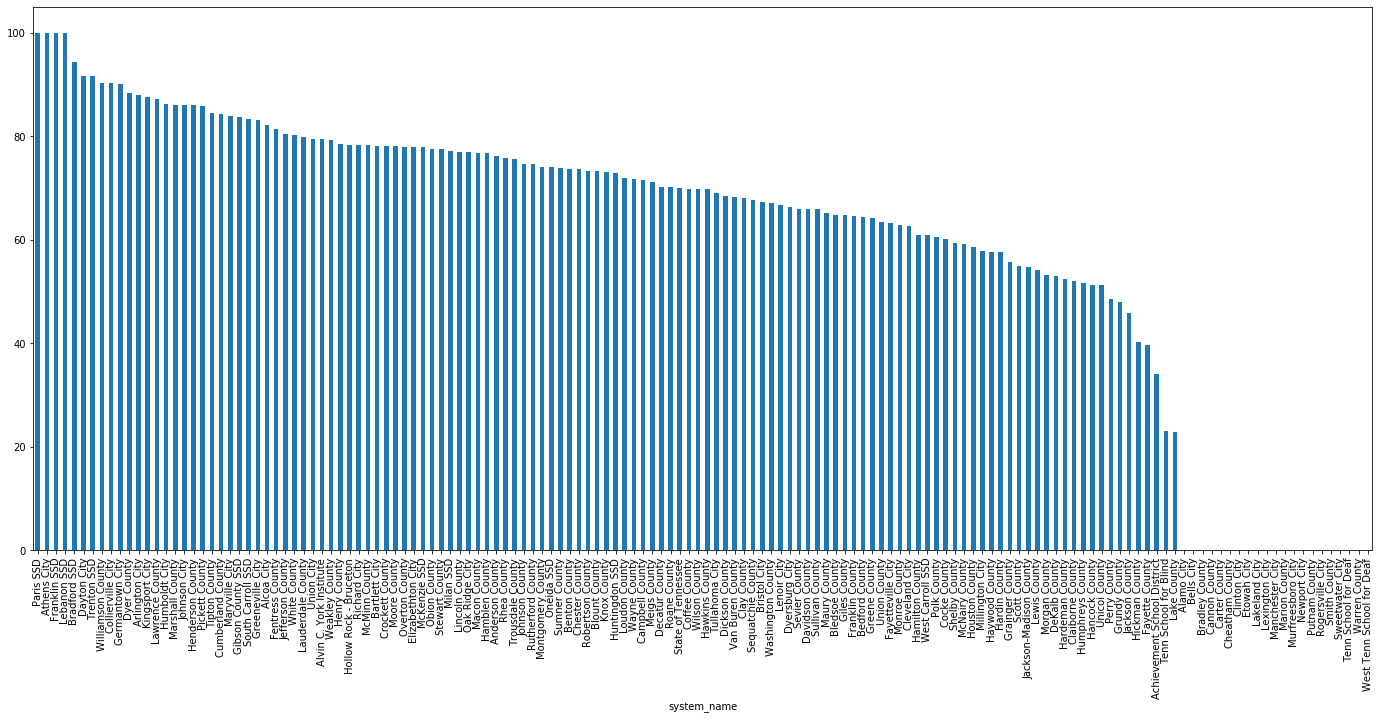

In [61]:
districts.groupby('system_name').alg_1.mean().sort_values(ascending=False).plot(kind='bar',figsize=(24,10))